<a href="https://colab.research.google.com/github/Byeolah-Kwon/KPMG-Project-Gender-Equality-in-the-Workplace/blob/main/BTT_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Random Forest

In [ ]:
#read in clean data
df = pd.read_csv('/content/drive/MyDrive/Data/TIDY_DATA/clean_data_merged2_pct.csv')
df.head()

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605


In [ ]:
y = df['EMPLOYMENT_FEMALE_PCT']
X = df.drop(columns=['EMPLOYMENT_FEMALE_PCT','Unnamed: 0'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('Begin RF Implementation...')

# 1. Create the RandomForestRegressor model object below and assign to variable 'rf_model'
rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)

# 2. Fit the model to the training data below
rf_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_rf_pred'
y_rf_pred = rf_model.predict(X_test)

# 4. Compute the MAPE (on y_test and y_rf_pred) and save the results to rf_mape
rf_mape = mean_absolute_percentage_error(y_test, y_rf_pred)

print('End')
print('mean absolute percentage error:')
formatted_number = "{:.3f}".format(rf_mape)
print(formatted_number)

Begin RF Implementation...
End
mean absolute percentage error:
3.476


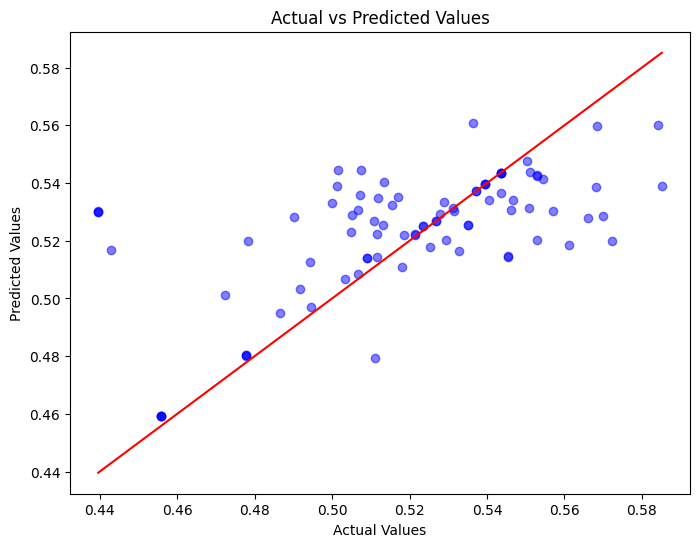

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_rf_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line showing perfect predictions

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
feature_imp = rf_model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores.
# Save the result to the variable 'df_features'
df_features = pd.DataFrame({'name': X_train.columns.values,'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'
df_sorted = df_features.sort_values(by='imp',ascending=False)

#4. Obtain the top 10 sorted feature names and save the result to list 'top_ten'
top_ten = list(df_sorted['name'].iloc[:25])
print(rf_model.feature_importances_)
print('Top ten features: {0}'.format(top_ten))

[0.02857497 0.0132334  0.03702336 0.02134743 0.07006511 0.07219829
 0.03404407 0.02034697 0.01762258 0.02522037 0.01878156 0.05852825
 0.02672065 0.17837522 0.06489401 0.02147981 0.0160637  0.02185064
 0.01977267 0.08816245 0.04653893 0.04544939 0.05370616]
Top ten features: ['MED_INC_PCT', 'BELOW_BACH_PCT_M', 'TAXI_TO_WORK_PCT', 'OTHER_TRANS_PCT', 'UPP_MED_INC_PCT', 'LOW_INC_PCT', 'ABOVE_BACH_PCT_F', 'ABOVE_BACH_PCT_M', 'BELOW_BACH_PCT_F', 'UNEMPLOYMENT_RATE', 'WALK_TO_WORK_PCT', 'ZIP_CODE', 'LOW_MED_INC_PCT', 'HH_IN_POVERTY', 'HH_Mod_Burden_PCT', 'UPPER_INC_PCT', 'NOT_PUBLIC_TRANS_PCT', 'PUBLIC_TRANSP_TO_WORK_PCT', 'HH_Sev_Burden_PCT', 'HH_INCOME', 'WORKED_FROM_HOME_PCT', 'HH_POVERTY_PCT', 'COUNTY_FIPS']


# Gradient Boosting

In [ ]:
#read in clean data
df = pd.read_csv('/content/drive/MyDrive/Data/TIDY_DATA/clean_data_merged2_pct.csv')
df.head()

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605


In [ ]:
y = df['EMPLOYMENT_FEMALE_PCT']
X = df.drop(columns=['EMPLOYMENT_FEMALE_PCT', 'Unnamed: 0'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# 1. Create the GradientBoostingRegressor model object below and assign it to variable 'gbdt_2_model'
gbdt_2_model = GradientBoostingRegressor(n_estimators=50, max_depth=2)

# 2. Fit the model to the training data
gbdt_2_model.fit(X_train, y_train)

# 3. Make predictions on the test data and assign the result to the variable 'gbdt_2_predictions'
gbdt_2_predictions = gbdt_2_model.predict(X_test)

# # 4. Create the GradientBoostingRegressor model object and assign it to variable 'gbdt_10_model'
# gbdt_10_model = GradientBoostingRegressor(n_estimators=50, max_depth=10)

# # 5. Fit the model to the training data
# gbdt_10_model.fit(X_train, y_train)

# # 6. Make predictions on the test data and assign the result to the variable 'gbdt_10_predictions'
# gbdt_10_predictions = gbdt_10_model.predict(X_test)

print('End')

End


In [ ]:
gbdt_error = mean_absolute_percentage_error(y_test, gbdt_2_predictions)

print('End')
print('Mean Absolute Percentage Error:')
formatted_number = "{:.3f}".format(gbdt_error)
print(formatted_number)

End
Mean Absolute Percentage Error:
3.913


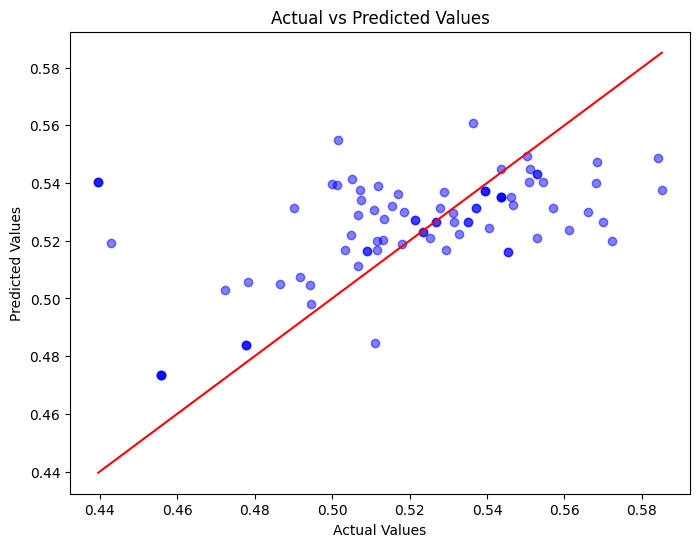

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, gbdt_2_predictions, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line showing perfect predictions

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
feature_imp = gbdt_2_model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores.
# Save the result to the variable 'df_features'
df_features = pd.DataFrame({'name': X_train.columns.values,'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'
df_sorted = df_features.sort_values(by='imp',ascending=False)

#4. Obtain the top 10 sorted feature names and save the result to list 'top_ten'
top_ten = list(df_sorted['name'].iloc[:25])
print(gbdt_2_model.feature_importances_)
print('Top ten features: {0}'.format(top_ten))

[0.01501011 0.03504181 0.01224785 0.00052164 0.10424618 0.07477771
 0.03402381 0.         0.01199205 0.00100119 0.         0.07831575
 0.01968679 0.26070207 0.03612899 0.00340914 0.         0.014469
 0.00934399 0.14246879 0.07520088 0.04237935 0.0290329 ]
Top ten features: ['MED_INC_PCT', 'BELOW_BACH_PCT_M', 'OTHER_TRANS_PCT', 'LOW_INC_PCT', 'ABOVE_BACH_PCT_M', 'TAXI_TO_WORK_PCT', 'BELOW_BACH_PCT_F', 'UPP_MED_INC_PCT', 'COUNTY_FIPS', 'WALK_TO_WORK_PCT', 'ABOVE_BACH_PCT_F', 'LOW_MED_INC_PCT', 'ZIP_CODE', 'HH_Mod_Burden_PCT', 'UNEMPLOYMENT_RATE', 'WORKED_FROM_HOME_PCT', 'HH_Sev_Burden_PCT', 'UPPER_INC_PCT', 'HH_IN_POVERTY', 'NOT_PUBLIC_TRANS_PCT', 'HH_INCOME', 'HH_POVERTY_PCT', 'PUBLIC_TRANSP_TO_WORK_PCT']


# Linear Regression

In [ ]:
#read in clean data
df = pd.read_csv('/content/drive/MyDrive/Data/TIDY_DATA/clean_data_merged2_pct.csv')
df.head()

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605


In [ ]:
y = df['EMPLOYMENT_FEMALE_PCT']
X = df.drop(columns=['EMPLOYMENT_FEMALE_PCT', 'Unnamed: 0', 'ZIP_CODE',
 'COUNTY_FIPS'], axis=1)
list(X.columns)

['UNEMPLOYMENT_RATE',
 'NOT_PUBLIC_TRANS_PCT',
 'OTHER_TRANS_PCT',
 'TAXI_TO_WORK_PCT',
 'WALK_TO_WORK_PCT',
 'PUBLIC_TRANSP_TO_WORK_PCT',
 'WORKED_FROM_HOME_PCT',
 'HH_IN_POVERTY',
 'HH_INCOME',
 'LOW_INC_PCT',
 'LOW_MED_INC_PCT',
 'MED_INC_PCT',
 'UPP_MED_INC_PCT',
 'UPPER_INC_PCT',
 'HH_POVERTY_PCT',
 'HH_Mod_Burden_PCT',
 'HH_Sev_Burden_PCT',
 'BELOW_BACH_PCT_M',
 'ABOVE_BACH_PCT_M',
 'BELOW_BACH_PCT_F',
 'ABOVE_BACH_PCT_F']

In [ ]:

# Display list of feature columns
print("First 5 features:", X.columns[:5].tolist())

# Display the label column
print("\nLabel:")
print(y.name)

First 5 features: ['UNEMPLOYMENT_RATE', 'NOT_PUBLIC_TRANS_PCT', 'OTHER_TRANS_PCT', 'TAXI_TO_WORK_PCT', 'WALK_TO_WORK_PCT']

Label:
EMPLOYMENT_FEMALE_PCT


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Create the  LinearRegression model object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

#  Make predictions on the test data
prediction = model.predict(X_test)

In [ ]:
linear_reg_error = mean_absolute_percentage_error(y_test, prediction)

print('End')
print('Mean Absolute Percentage Error:')
formatted_number = "{:.3f}".format(linear_reg_error)
print(formatted_number)

End
Mean Absolute Percentage Error:
1.969


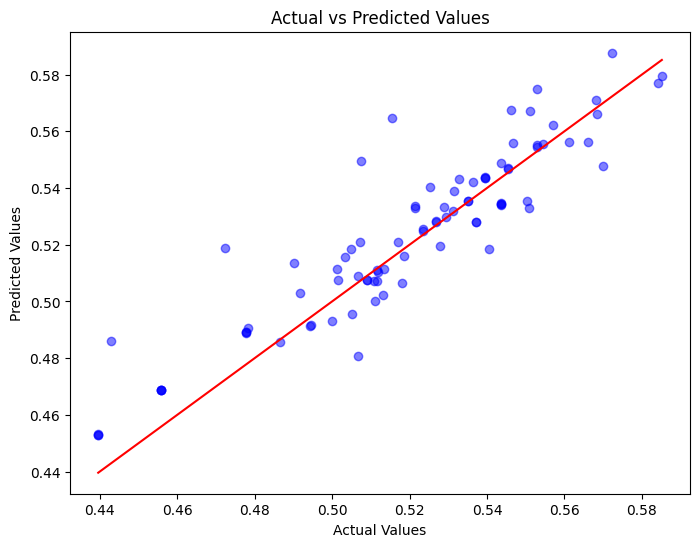

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, prediction, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line showing perfect predictions

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
feature_imp = model.coef_
#2. Create a Pandas DataFrame with a list of all features and their scores.
# Save the result to the variable 'df_features'

# YOUR CODE HERE
df_features = pd.DataFrame({'name': X_train.columns.values,'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

# YOUR CODE HERE
df_sorted = df_features.sort_values(by='imp',ascending=False)

#4. Obtain the top 10 sorted feature names and save the result to list 'top_ten'

# YOUR CODE HERE
top_ten = list(df_sorted['name'].iloc[:25])
print(model.coef_)
print('Top ten features: {0}'.format(top_ten))

[-3.80811629e-06 -3.85305075e-05  1.23543672e-01 -2.01262535e+06
 -2.01262540e+06 -2.01262539e+06 -2.01262529e+06 -2.01262532e+06
 -2.01262542e+06 -1.66209922e-07 -1.78238549e-03 -2.33989029e-01
 -1.31094319e-01 -1.73730088e-01  6.69117911e-02  6.80610211e-02
  3.16072469e-02 -1.91016839e-02  3.07558182e-02 -7.23390652e-01
 -5.06552162e-01  6.64178208e-01  5.57535273e-01]
Top ten features: ['BELOW_BACH_PCT_F', 'ABOVE_BACH_PCT_F', 'UNEMPLOYMENT_RATE', 'UPPER_INC_PCT', 'UPP_MED_INC_PCT', 'HH_POVERTY_PCT', 'HH_Sev_Burden_PCT', 'HH_IN_POVERTY', 'ZIP_CODE', 'COUNTY_FIPS', 'HH_INCOME', 'HH_Mod_Burden_PCT', 'LOW_MED_INC_PCT', 'MED_INC_PCT', 'LOW_INC_PCT', 'ABOVE_BACH_PCT_M', 'BELOW_BACH_PCT_M', 'WALK_TO_WORK_PCT', 'PUBLIC_TRANSP_TO_WORK_PCT', 'NOT_PUBLIC_TRANS_PCT', 'TAXI_TO_WORK_PCT', 'OTHER_TRANS_PCT', 'WORKED_FROM_HOME_PCT']


# Merged Data Set (+transportation pct)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive//Data/TIDY_DATA/clean_data_merged.csv')
list(df.columns)

['ZIP_CODE',
 'COUNTY_FIPS',
 'HOUSEHOLDS',
 'HH_INCOME',
 'UNEMPLOYMENT_RATE',
 'PUBLIC_TRANSP_TO_WORK_PCT',
 'WORKED_FROM_HOME_PCT',
 'HH_RENTED_PCT',
 'RENT_TO_INCOME_PCT',
 'HH_UNDER_10K',
 'HH_10K_15K',
 'HH_15K_20K',
 'HH_20K_25K',
 'HH_25K_30K',
 'HH_30K_35K',
 'HH_35K_40K',
 'HH_40K_45K',
 'HH_45K_50K',
 'HH_50K_60K',
 'HH_60K_75K',
 'HH_75K_100K',
 'HH_100K_125K',
 'HH_125K_150K',
 'HH_150K_200K',
 'HH_OVER_200K',
 'HH_IN_POVERTY',
 'POP_EDUC',
 'EDUC_NONE',
 'EDUC_HS',
 'EDUC_GED',
 'EDUC_ASSOC',
 'EDUC_BA_BS',
 'EDUC_MA_MS',
 'EDUC_PROF',
 'EDUC_PHD',
 'POP_EMPLOY',
 'LABOR_FORCE',
 'EMPLOYED',
 'UNEMPLOYED',
 'NOT_IN_LABOR_FORCE',
 'POP_TRANSP',
 'TRANSP_CAR_TO_WORK',
 'TRANSP_PUBLIC_TO_WORK',
 'TRANSP_BICYCLE_TO_WORK',
 'TRANSP_MOTORCYCLE_TO_WORK',
 'TRANSP_OTHER_TO_WORK',
 'TRANSP_TAXI_TO_WORK',
 'TRANSP_WALKED_TO_WORK',
 'TRANSP_WORKED_FROM_HOME',
 'HH_RENTED',
 'HH_RATIO',
 'HH_RATIO_10_OR_LESS',
 'HH_RATIO_10_15',
 'HH_RATIO_15_20',
 'HH_RATIO_20_25',
 'HH_RATIO_25_30'

In [ ]:
df = df.drop(columns=['EMPLOYMENT_MALE_16_19_UNEMPLOYED',
 'EMPLOYMENT_MALE_20_21_UNEMPLOYED',
 'EMPLOYMENT_MALE_22_24_UNEMPLOYED',
 'EMPLOYMENT_MALE_25_29_UNEMPLOYED',
 'EMPLOYMENT_MALE_30_34_UNEMPLOYED',
 'EMPLOYMENT_MALE_35_44_UNEMPLOYED',
 'EMPLOYMENT_MALE_45_54_UNEMPLOYED',
 'EMPLOYMENT_MALE_55_59_UNEMPLOYED',
 'EMPLOYMENT_MALE_60_61_UNEMPLOYED',
 'EMPLOYMENT_MALE_62_64_UNEMPLOYED',
 'EMPLOYMENT_MALE_65_69_UNEMPLOYED',
  'EMPLOYMENT_FEMALE_16_19_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_20_21_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_22_24_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_25_29_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_30_34_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_35_44_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_45_54_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_55_59_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_60_61_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_62_64_UNEMPLOYED',
 'EMPLOYMENT_FEMALE_65_69_UNEMPLOYED',
 'EMPLOYMENT_MALE_POP',
 'ZIP_CODE',
 'COUNTY_FIPS'
    ])

In [ ]:
#education
# combine education feature columns
df['EMPLOYMENT_FEMALE_PCT'] = df['EMPLOYMENT_FEMALE_POP']  / df['EMPLOYMENT_POP']
df['BELOW_BACH_PCT_M'] = (df['EDUC_MALE_NONE'] + df['EDUC_MALE_HIGH_SCHOOL'] + df['EDUC_MALE_ASSOC']) / df['POP_EDUC']
df['ABOVE_BACH_PCT_M'] = (df['EDUC_MALE_BACHELORS'] + df['EDUC_MALE_MASTERS'] + df['EDUC_MALE_PROF'] +  df['EDUC_MALE_PHD']) / df['POP_EDUC']
df['BELOW_BACH_PCT_F'] = (df['EDUC_FEMALE_NONE'] + df['EDUC_FEMALE_HIGH_SCHOOL'] + df['EDUC_FEMALE_ASSOC']) / df['POP_EDUC']
df['ABOVE_BACH_PCT_F'] = (df['EDUC_FEMALE_BACHELORS'] + df['EDUC_FEMALE_MASTERS'] + df['EDUC_FEMALE_PROF'] +  df['EDUC_FEMALE_PHD']) / df['POP_EDUC']

In [ ]:
# combine rent burden feature columns
df['HH_Mod_Burden_PCT'] = (df['HH_RATIO_30_35'] + df['HH_RATIO_35_40'] + df['HH_RATIO_40_50']) / df['HH_RATIO']
df['HH_Sev_Burden_PCT'] = df['HH_RATIO_50_OR_MORE'] / df['HH_RATIO']
df['HH_POVERTY_PCT'] = df['HH_IN_POVERTY'] / df['HOUSEHOLDS']

In [ ]:
# https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system
# combine HH Inc feature columns
df['LOW_INC_PCT'] = (df['HH_UNDER_10K'] + df['HH_10K_15K'] + df['HH_15K_20K'] + df['HH_20K_25K'] + df['HH_25K_30K']) / df['HOUSEHOLDS']
df['LOW_MED_INC_PCT'] = (df['HH_30K_35K'] + df['HH_35K_40K'] + df['HH_40K_45K'] + df['HH_45K_50K']) / df['HOUSEHOLDS']
df['MED_INC_PCT'] = (df['HH_50K_60K'] + df['HH_60K_75K'] + df['HH_75K_100K']) / df['HOUSEHOLDS']
df['UPP_MED_INC_PCT'] = (df['HH_100K_125K'] + df['HH_125K_150K']) / df['HOUSEHOLDS']
df['UPPER_INC_PCT'] = (df['HH_150K_200K'] + df['HH_OVER_200K']) / df['HOUSEHOLDS']

In [ ]:
#transportation
df['NOT_PUBLIC_TRANS_PCT'] = (df['TRANSP_BICYCLE_TO_WORK'] + df['TRANSP_CAR_TO_WORK'] + df['TRANSP_MOTORCYCLE_TO_WORK'])/df['POP_TRANSP']
df['WALK_TO_WORK_PCT'] = df['TRANSP_WALKED_TO_WORK']/df['POP_TRANSP']
df['TAXI_TO_WORK_PCT'] = df['TRANSP_TAXI_TO_WORK']/df['POP_TRANSP']
df['OTHER_TRANS_PCT'] = df['TRANSP_OTHER_TO_WORK']/df['POP_TRANSP']

In [ ]:
list(df.columns)

['HOUSEHOLDS',
 'HH_INCOME',
 'UNEMPLOYMENT_RATE',
 'PUBLIC_TRANSP_TO_WORK_PCT',
 'WORKED_FROM_HOME_PCT',
 'HH_RENTED_PCT',
 'RENT_TO_INCOME_PCT',
 'HH_UNDER_10K',
 'HH_10K_15K',
 'HH_15K_20K',
 'HH_20K_25K',
 'HH_25K_30K',
 'HH_30K_35K',
 'HH_35K_40K',
 'HH_40K_45K',
 'HH_45K_50K',
 'HH_50K_60K',
 'HH_60K_75K',
 'HH_75K_100K',
 'HH_100K_125K',
 'HH_125K_150K',
 'HH_150K_200K',
 'HH_OVER_200K',
 'HH_IN_POVERTY',
 'POP_EDUC',
 'EDUC_NONE',
 'EDUC_HS',
 'EDUC_GED',
 'EDUC_ASSOC',
 'EDUC_BA_BS',
 'EDUC_MA_MS',
 'EDUC_PROF',
 'EDUC_PHD',
 'POP_EMPLOY',
 'LABOR_FORCE',
 'EMPLOYED',
 'UNEMPLOYED',
 'NOT_IN_LABOR_FORCE',
 'POP_TRANSP',
 'TRANSP_CAR_TO_WORK',
 'TRANSP_PUBLIC_TO_WORK',
 'TRANSP_BICYCLE_TO_WORK',
 'TRANSP_MOTORCYCLE_TO_WORK',
 'TRANSP_OTHER_TO_WORK',
 'TRANSP_TAXI_TO_WORK',
 'TRANSP_WALKED_TO_WORK',
 'TRANSP_WORKED_FROM_HOME',
 'HH_RENTED',
 'HH_RATIO',
 'HH_RATIO_10_OR_LESS',
 'HH_RATIO_10_15',
 'HH_RATIO_15_20',
 'HH_RATIO_20_25',
 'HH_RATIO_25_30',
 'HH_RATIO_30_35',
 'HH_RAT

In [ ]:
new_df = df[[
'UNEMPLOYMENT_RATE',
'NOT_PUBLIC_TRANS_PCT',
'OTHER_TRANS_PCT',
'TAXI_TO_WORK_PCT',
'WALK_TO_WORK_PCT',
'PUBLIC_TRANSP_TO_WORK_PCT',
'WORKED_FROM_HOME_PCT',
'HH_IN_POVERTY',
'HH_INCOME',
'LOW_INC_PCT',
'LOW_MED_INC_PCT',
'MED_INC_PCT',
'UPP_MED_INC_PCT',
'UPPER_INC_PCT',
'HH_POVERTY_PCT',
'HH_Mod_Burden_PCT',
'HH_Sev_Burden_PCT',
'EMPLOYMENT_FEMALE_PCT',
'BELOW_BACH_PCT_M',
'ABOVE_BACH_PCT_M',
'BELOW_BACH_PCT_F',
'ABOVE_BACH_PCT_F']]
new_df

,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,HH_IN_POVERTY,HH_INCOME,LOW_INC_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,1709.0,110.515834,0.170602,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
1,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,1709.0,110.515834,0.170602,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
2,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,1709.0,110.515834,0.170602,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
3,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,1709.0,110.515834,0.170602,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
4,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,1709.0,110.515834,0.170602,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.088770,0.468406,0.014356,0.007335,0.038248,0.429739,0.041916,1479.0,71.633167,0.308525,...,0.140884,0.131425,0.184070,0.295502,0.236288,0.537072,0.193276,0.100044,0.210118,0.163124
260,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,780.0,79.040327,0.262317,...,0.169869,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698
261,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,780.0,79.040327,0.262317,...,0.169869,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698
262,0.070301,0.621529,0.012689,0.006552,0.077171,0.241186,0.040874,1060.0,97.394840,0.204123,...,0.186725,0.261916,0.126311,0.212487,0.253854,0.510792,0.165017,0.198603,0.144124,0.247677


In [ ]:
column_names = new_df.columns.tolist()  # Extract column names as a list

# Create a DataFrame to display column names
columns_df = pd.DataFrame({'Column Names': column_names})

print(columns_df)

                 Column Names
0           UNEMPLOYMENT_RATE
1        NOT_PUBLIC_TRANS_PCT
2             OTHER_TRANS_PCT
3            TAXI_TO_WORK_PCT
4            WALK_TO_WORK_PCT
5   PUBLIC_TRANSP_TO_WORK_PCT
6        WORKED_FROM_HOME_PCT
7               HH_IN_POVERTY
8                   HH_INCOME
9                 LOW_INC_PCT
10            LOW_MED_INC_PCT
11                MED_INC_PCT
12            UPP_MED_INC_PCT
13              UPPER_INC_PCT
14             HH_POVERTY_PCT
15          HH_Mod_Burden_PCT
16          HH_Sev_Burden_PCT
17      EMPLOYMENT_FEMALE_PCT
18           BELOW_BACH_PCT_M
19           ABOVE_BACH_PCT_M
20           BELOW_BACH_PCT_F
21           ABOVE_BACH_PCT_F


## New dataframe to delve into education

In [ ]:
df_edu = pd.read_csv('/content/drive/MyDrive//Data/TIDY_DATA/clean_data_merged.csv')
df_edu.shape

(264, 105)

In [ ]:
list(df_edu.columns)

['ZIP_CODE',
 'COUNTY_FIPS',
 'HOUSEHOLDS',
 'HH_INCOME',
 'UNEMPLOYMENT_RATE',
 'PUBLIC_TRANSP_TO_WORK_PCT',
 'WORKED_FROM_HOME_PCT',
 'HH_RENTED_PCT',
 'RENT_TO_INCOME_PCT',
 'HH_UNDER_10K',
 'HH_10K_15K',
 'HH_15K_20K',
 'HH_20K_25K',
 'HH_25K_30K',
 'HH_30K_35K',
 'HH_35K_40K',
 'HH_40K_45K',
 'HH_45K_50K',
 'HH_50K_60K',
 'HH_60K_75K',
 'HH_75K_100K',
 'HH_100K_125K',
 'HH_125K_150K',
 'HH_150K_200K',
 'HH_OVER_200K',
 'HH_IN_POVERTY',
 'POP_EDUC',
 'EDUC_NONE',
 'EDUC_HS',
 'EDUC_GED',
 'EDUC_ASSOC',
 'EDUC_BA_BS',
 'EDUC_MA_MS',
 'EDUC_PROF',
 'EDUC_PHD',
 'POP_EMPLOY',
 'LABOR_FORCE',
 'EMPLOYED',
 'UNEMPLOYED',
 'NOT_IN_LABOR_FORCE',
 'POP_TRANSP',
 'TRANSP_CAR_TO_WORK',
 'TRANSP_PUBLIC_TO_WORK',
 'TRANSP_BICYCLE_TO_WORK',
 'TRANSP_MOTORCYCLE_TO_WORK',
 'TRANSP_OTHER_TO_WORK',
 'TRANSP_TAXI_TO_WORK',
 'TRANSP_WALKED_TO_WORK',
 'TRANSP_WORKED_FROM_HOME',
 'HH_RENTED',
 'HH_RATIO',
 'HH_RATIO_10_OR_LESS',
 'HH_RATIO_10_15',
 'HH_RATIO_15_20',
 'HH_RATIO_20_25',
 'HH_RATIO_25_30'

In [ ]:
df_edu['EMPLOYMENT_FEMALE_PCT'] = df_edu['EMPLOYMENT_FEMALE_POP']  / df_edu['EMPLOYMENT_POP']

In [ ]:
df_edu['FEMALE_HIGH_SCHOOL_PCT'] = df_edu['EDUC_FEMALE_HIGH_SCHOOL'] / df_edu['EDUC_SEX_POP']

In [ ]:
df_edu['FEMALE_ASSOC_PCT'] = df_edu['EDUC_FEMALE_ASSOC'] / df_edu['EDUC_SEX_POP']

In [ ]:
df_edu['FEMALE_BACHELORS_PCT'] = df_edu['EDUC_FEMALE_BACHELORS'] / df_edu['EDUC_SEX_POP']

In [ ]:
df_edu['FEMALE_ABOVE_BACH_PCT'] = (df_edu['EDUC_FEMALE_MASTERS'] + df_edu['EDUC_FEMALE_PROF'] + df_edu['EDUC_FEMALE_PHD']) / df_edu['EDUC_SEX_POP']

In [ ]:
df_edu['FEMALE_PROF_PCT'] = df_edu['EDUC_FEMALE_PROF'] / df_edu['EDUC_SEX_POP']

In [ ]:
columns = ['EMPLOYMENT_FEMALE_PCT', 'FEMALE_HIGH_SCHOOL_PCT', 'FEMALE_ASSOC_PCT', 'FEMALE_BACHELORS_PCT', 'FEMALE_ABOVE_BACH_PCT', 'FEMALE_PROF_PCT']

In [ ]:
df_edu[columns]

,EMPLOYMENT_FEMALE_PCT,FEMALE_HIGH_SCHOOL_PCT,FEMALE_ASSOC_PCT,FEMALE_BACHELORS_PCT,FEMALE_ABOVE_BACH_PCT,FEMALE_PROF_PCT
0,0.537269,0.042402,0.024512,0.232485,0.140120,0.026860
1,0.537269,0.042402,0.024512,0.232485,0.140120,0.026860
2,0.537269,0.042402,0.024512,0.232485,0.140120,0.026860
3,0.537269,0.042402,0.024512,0.232485,0.140120,0.026860
4,0.537269,0.042402,0.024512,0.232485,0.140120,0.026860
...,...,...,...,...,...,...
259,0.537072,0.135243,0.055762,0.113165,0.049959,0.004479
260,0.584039,0.142549,0.061812,0.112825,0.092873,0.011108
261,0.584039,0.142549,0.061812,0.112825,0.092873,0.011108
262,0.510792,0.104889,0.030367,0.121895,0.125782,0.017917


<Axes: xlabel='FEMALE_HIGH_SCHOOL_PCT', ylabel='EMPLOYMENT_FEMALE_POP'>

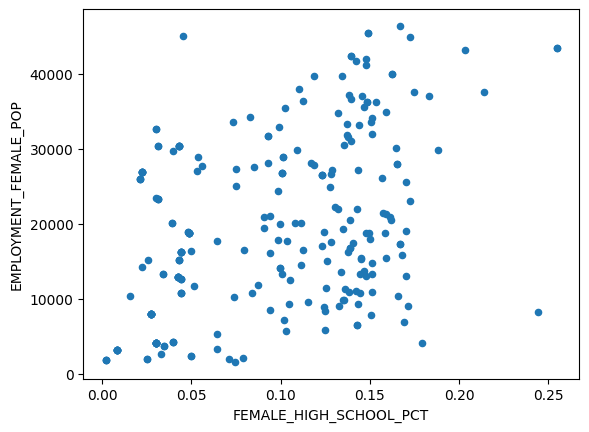

In [ ]:
df_edu.plot.scatter(x='FEMALE_HIGH_SCHOOL_PCT', y='EMPLOYMENT_FEMALE_POP')

In [ ]:
mean_value = df_edu['FEMALE_HIGH_SCHOOL_PCT'].mean()

print("Mean of the column 'FEMALE_HIGH_SCHOOL_PCT' is:", mean_value)

Mean of the column 'FEMALE_HIGH_SCHOOL_PCT' is: 0.0930851642747945


<Axes: xlabel='FEMALE_ASSOC_PCT', ylabel='EMPLOYMENT_FEMALE_POP'>

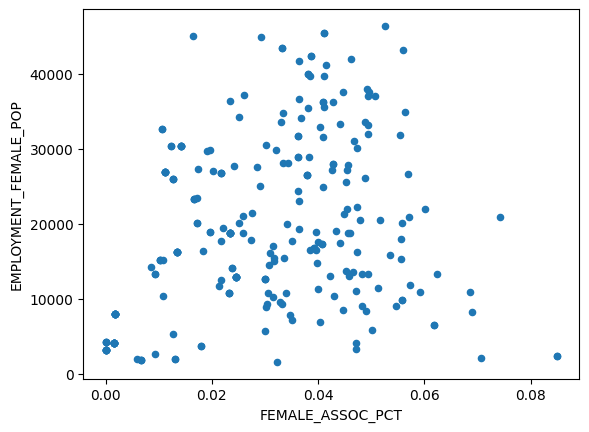

In [ ]:
df_edu.plot.scatter(x='FEMALE_ASSOC_PCT', y='EMPLOYMENT_FEMALE_POP')

In [ ]:
mean_value = df_edu['FEMALE_ASSOC_PCT'].mean()

print("Mean of the column 'FEMALE_ASSOC_PCT' is:", mean_value)

Mean of the column 'FEMALE_ASSOC_PCT' is: 0.0299036541372161


<Axes: xlabel='FEMALE_BACHELORS_PCT', ylabel='EMPLOYMENT_FEMALE_POP'>

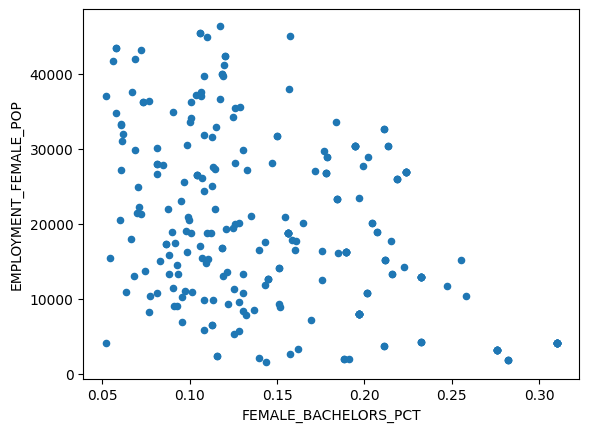

In [ ]:
df_edu.plot.scatter(x='FEMALE_BACHELORS_PCT', y='EMPLOYMENT_FEMALE_POP')

In [ ]:
mean_value = df_edu['FEMALE_BACHELORS_PCT'].mean()

print("Mean of the column 'FEMALE_BACHELORS_PCT' is:", mean_value)

Mean of the column 'FEMALE_BACHELORS_PCT' is: 0.1531319397631284


<Axes: xlabel='FEMALE_ABOVE_BACH_PCT', ylabel='EMPLOYMENT_FEMALE_POP'>

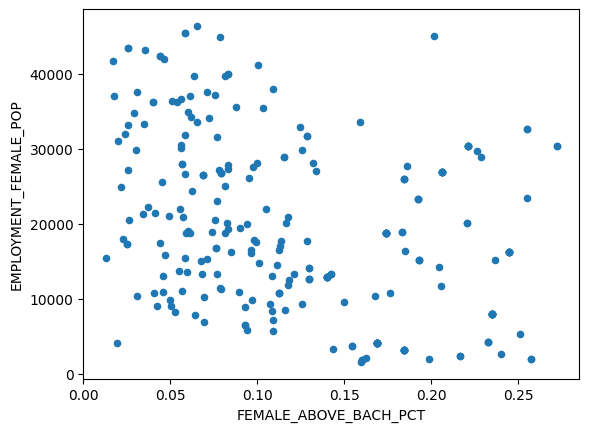

In [ ]:
df_edu.plot.scatter(x='FEMALE_ABOVE_BACH_PCT', y='EMPLOYMENT_FEMALE_POP')

In [ ]:
mean_value = df_edu['FEMALE_ABOVE_BACH_PCT'].mean()

print("Mean of the column 'FEMALE_ABOVE_BACH_PCT' is:", mean_value)

Mean of the column 'FEMALE_ABOVE_BACH_PCT' is: 0.12427352532941424


<Axes: xlabel='FEMALE_PROF_PCT', ylabel='EMPLOYMENT_FEMALE_POP'>

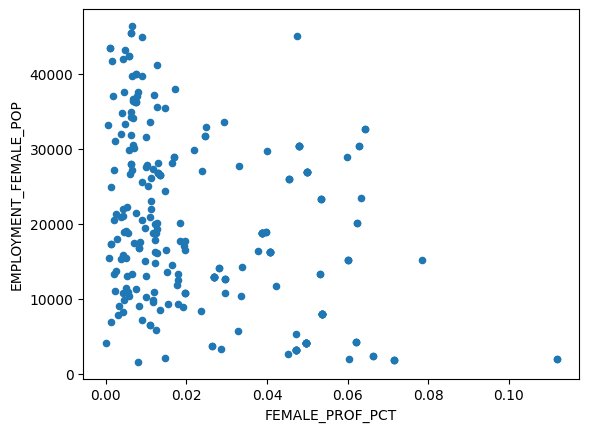

In [ ]:
df_edu.plot.scatter(x='FEMALE_PROF_PCT', y='EMPLOYMENT_FEMALE_POP')

<Axes: xlabel='SUM_COLUMNS', ylabel='EMPLOYMENT_FEMALE_POP'>

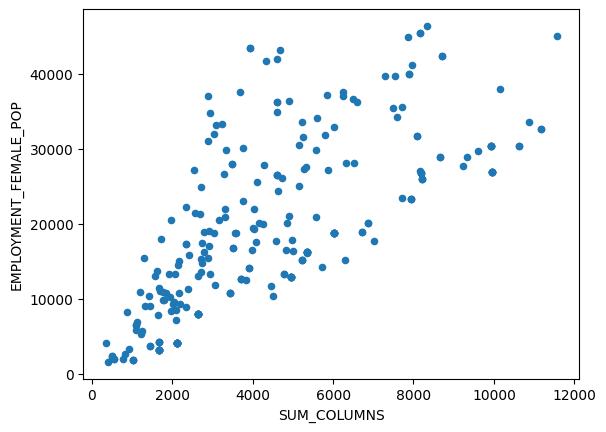

In [ ]:
df_edu['SUM_COLUMNS'] = df_edu['FEMALE_HIGH_SCHOOL_PCT'] + df_edu['FEMALE_ABOVE_BACH_PCT'] + df_edu['FEMALE_ASSOC_PCT'] + df_edu['EDUC_FEMALE_BACHELORS']

df_edu.plot.scatter(x='SUM_COLUMNS', y='EMPLOYMENT_FEMALE_POP')